### 2.7 Доверительные интервалы

Проверка гипотез - качественная оценка, с помощью доверительных интервалов можем получить количественную оценку.

В математической статистике - интервал, в пределах которого с заданной вероятностью лежат выборочные оценки статистических характеристик генеральной совокупности.

**ДИ для разности средних**

Видоизменим формулу для $\Large t$ так, чтобы распределение были центрировано относительно 0, просто вычитая разность истинных(!) средних распредления, то есть средних генеральной совокупности, разницу которых мы и хотим оценить.

**t** = $ \Large \frac{\text{Разность выборочных средних} - \text{Разность истинных средних}} {\text{Стандартная ошибка разности выборочных средних}} $

**t** = $ \Large \frac{\overline{X_1}-\overline{X_2}} {{S_{\overline{X_1} - \overline{X_2}}}} = \frac{(\overline{X_1}-\overline{X_2}) - (\mu_1 - \mu_2)} {{S_{\overline{X_1} - \overline{X_2}}}} $, также справедливо, так как $ 100(1 – \alpha/2) $
процентов значений t попадают в интервал от $ –t\alpha/2 $ до $ +t\alpha/2 $.

$\Large - t_{\alpha/2} < \frac{(\overline{X_1}-\overline{X_2}) - (\mu_1 - \mu_2)} {{S_{\overline{X_1} - \overline{X_2}}}} < + t_{\alpha/2}$,

$\Large (\overline{X_1}-\overline{X_2}) - t_{\alpha / 2} S_{\overline{X_1} - \overline{X_2}} < \mu_1 - \mu_2 <  (\overline{X_1}-\overline{X_2}) + t_{\alpha/2} S_{\overline{X_1} - \overline{X_2}} $

Полученное неравенство задает **доверительный интервал** для разности средних, в этот интервал разность истинных средних попадет в 95% случаев, при $\Large \alpha$ = 0.05.

**Задача**. Курьеры ездили на велосипедах, затем им выдали электросамокаты. Понять, увеличилась ли скорость доставки на электросамокатах. 

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
np.random.seed(seed=233423)

import matplotlib.pyplot as plt
%matplotlib inline


# Построим две новые теоретические генеральные совокупности:
# курьеры, которые доставляли на велосипедах:
norm_vel = stats.norm(loc=37, scale = 10)
# курьеры, которые доставляли на электросамокатах:
norm_sam = stats.norm(loc=28, scale = 13)

norm_vel_sample = norm_vel.rvs(size=50)
norm_sam_sample = norm_sam.rvs(size=50)

In [2]:
#Расчет для задачи про курьеров на разных транспортных средствах
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(norm_vel_sample), sms.DescrStatsW(norm_sam_sample))
print (cm.tconfint_diff())

(2.2673047124784818, 11.246070352844225)


То есть, с 95% вероятностью можно утверждать, что с новыми самокатами курьеры уменьшили время доставки от 2 до 11 минут.

**Если 100(1 – α)-процентный доверительный интервал разности средних не содержит нуля, то различия статистически значимы (Р < α); напротив, если этот интервал содержит ноль, то различия статистически не значимы (Р > α).**

Можно применять, как и в случае с критериями, только тогда, когда совокупность имеет хотя бы приближенно нормальное распредление. 

С помощью доверительных интервалов мы точно также можем проверять статистические гипотезы.

In [3]:
cm = sms.CompareMeans(sms.DescrStatsW(norm_vel_sample), sms.DescrStatsW(norm_sam_sample))
print (cm.tconfint_diff(alpha=0.01))

(0.813884439289728, 12.699490626032977)


Здесь уже утверждаем с вероятностью 99%.

**ДИ для среднего**

$ \Large \overline{X} - t_{\alpha/2} S_{\overline{X}} < \mu <  \overline{X} + t_{\alpha/2} S_{\overline{X}} $

In [4]:
t = sms.DescrStatsW(norm_vel_sample)
t.tconfint_mean()

(33.20110922608528, 38.33652874013045)

То есть истинное среднее с 95% вероятностью лежит в интервале от 33 до 38 минуты.

**ДИ для разности долей**

$ \Large (\hat{p_1}-\hat{p_2}) - z_{\alpha/2} S_{\hat{p_1} - \hat{p_2}} < p1 - p2 <  (\hat{p_1}-\hat{p_2}) + z_{\alpha/2} S_{\hat{p_1} - \hat{p_2}} $

In [5]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05): 
    #PPF - оппределяет значение функции по заданной вероятности     
    
    #Z-критерий имеет нормальное распределение
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

Еще раз про **pdf**,**ppf** и **cdf**

In [6]:
gaussian = stats.norm(loc=0.0, scale=1.0)
x = np.linspace(-5.0, 5.0, 100)

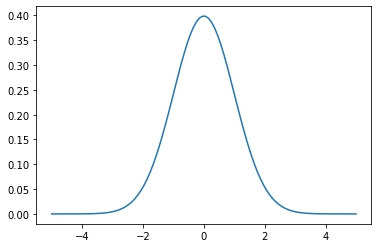

In [7]:
# при заданном распределении, какова вероятность наблюдения
y_pdf = gaussian.pdf(x)
plt.plot(x,y_pdf)

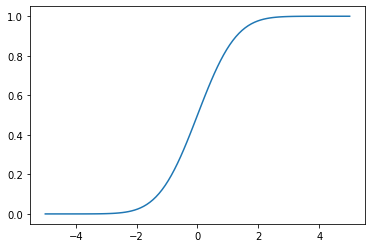

In [8]:
# при заданном распределении, какова вероятность того, что результат окажется меньше или равен заданному
z = gaussian.cdf(x)
plt.plot(x,z)

In [9]:
# Функция обратная CDF, где у нас задаются вероятности
# Какое значение имеет заданную вероятность при заданной функции распределения
print(stats.norm.ppf(0.5))
print(stats.norm.ppf(0.01))

0.0
-2.3263478740408408


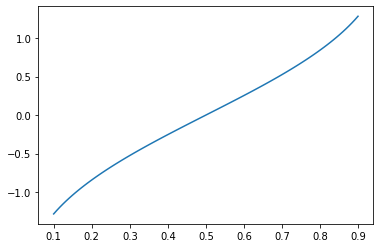

In [10]:
probs = np.linspace(0.1,0.9,100)
ppf = gaussian.ppf(probs)
plt.plot(probs,ppf)

**ДИ для разности долей (связанные выборки)**

$$ \Large \frac{f - g}{n} - z_{\alpha/2}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}} <p_1 - p_2 <  \frac{f - g}{n} + z_{\alpha/2}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [11]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

**ДИ для доли**

$ \Large \hat{p} - z_{\alpha/2} S_{\hat{p}}<  p  < \hat{p} + z_{\alpha/2} S_{\hat{p}} $

In [12]:
import statsmodels
statsmodels.stats.proportion.proportion_confint(400,800)

(0.465352404391258, 0.534647595608742)

Доверительный интервал для доли кликов на баннер B.

In [13]:
statsmodels.stats.proportion.proportion_confint(4,8)

(0.15352404391258045, 0.8464759560874195)

С малым кол-вом наблюдений доверительный интервал очень широкий, совершенно не уверены в заявленной доли.

### Непараметрические критерии

Непараметрические критерии не требуют соответствия какому-либо из распределений. Непараметрические критерии заменяют реальные значения признака рангами. 

По сравнению с парамтерическими критериями, непараметрические - менее чувствительны.

### 2.9 Критерий знаков 

### Одновыборочный критерий

Очень простой критерий, не требует от выборки практически ничего. Его мощность составляет примерно 2/3 мощности критерия Стьюдента.

Проверим гипотезу о том, что курьеры на велосипедах доставляют заказ за 40 минут.

H0: med X = 40

H1: med X <> 40

M = $ \frac {N(+) - N(-)} {2} $, где N(+) - кол-во значений больше проверяемого значения, N(-) - меньше.

Статистика данного критерия будет иметь биноминальное распределение.

In [2]:
norm_vel_sample

array([29.90537131, 41.51641505, 39.16887653, 62.88805331, 46.45908516,
       31.28816531, 29.87775103, 28.76428319, 30.43395038, 31.91912166,
       45.4854331 , 41.3478631 , 24.58664468, 35.78256423, 38.76670304,
       25.91107488, 44.0169818 , 61.20208294, 50.68808286, 39.27319929,
       24.88867563, 31.38006995, 45.43965008, 23.11459189, 41.11943426,
       25.65411019, 32.58537847, 40.21341924, 40.92185705, 33.04549801,
       28.25062387, 26.61121981, 33.43256446, 30.99335375, 31.19437811,
       44.41422034, 45.56531822, 41.59749497, 35.24973984, 22.27153502,
       41.20946482, 25.51437897, 32.61714704, 30.8223441 , 31.30167461,
       23.91757042, 31.06342411, 45.22536446, 37.18751564, 32.35722899])

In [3]:
N_plus = len([x for x in norm_vel_sample if x>40])
N_minus = len([x for x in norm_vel_sample if x<40])

In [4]:
N_plus

17

In [5]:
N_minus

33

In [14]:
M = (N_plus - N_minus)/2
M

-8.0

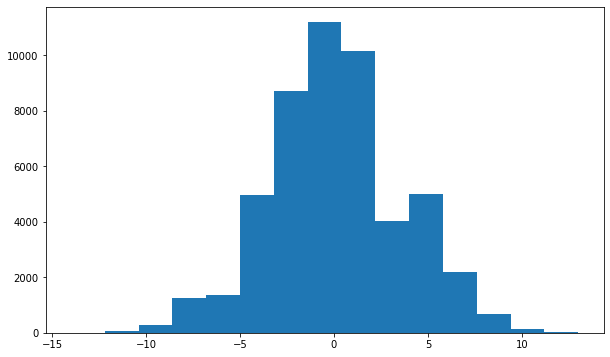

In [7]:
M_stat = []

norm_vel = stats.norm(loc=40, scale = 2)

for i in range(50000):
    norm_vel_sample_ = norm_vel.rvs(size=50)
    
    N_plus = len([x for x in norm_vel_sample_ if x>40])
    N_minus = len([x for x in norm_vel_sample_ if x<40])
    M_stat.append((N_plus - N_minus)/2)

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(M_stat,bins = 15)
plt.show()

In [8]:
S = pd.Series(M_stat)
(S[S<=-8].shape[0]+S[S>=8].shape[0])/S.shape[0]

0.03232

Статистика критерия имеет биноминальное распределение.

In [11]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(norm_vel_sample, 40)

(-8.0, 0.03283913756426849)

Гипотеза H0 отвергается.

### Двувыборочный критерий для связанных выборок

Аналогично можно посчитать критерий для связанных выборок.

$ H0: P(X_1 > X_2) = \frac{1} {2}$

$ H1: P(X_1 > X_2) <> \frac{1} {2}$

Курьерам выдали велосипеды и записали среднее время, с которым они доставляли заказы до и после выдачи. 

In [18]:
norm_rv1 = stats.norm(loc=35, scale = 10)


df = pd.DataFrame()
df['courier_id'] = np.arange(0,100)
df['time_before'] = norm_rv1.rvs(size=100)
df['time_after'] = norm_rv1.rvs(size=100)
df['stat_M'] = np.where(df.time_before > df.time_after,1,0)
df.head()

,courier_id,time_before,time_after,stat_M
0,0,35.913613,38.101909,0
1,1,38.408630,25.874920,1
2,2,20.729774,30.836369,0
3,3,50.186385,49.587923,1
4,4,30.150604,41.098808,0


Аналогично одновыборочному критерию:

In [19]:
N_plus = df.stat_M.sum()
N_minus = df.shape[0] - N_plus

In [20]:
M = (N_plus - N_minus)/2
M

-7.0

In [21]:
sign_test(df.time_before - df.time_after)

(-7.0, 0.19334790449564238)

### Ранговые критерии

Знаковые критерии выбрасывают большую часть информации, вместо значений используют лишь бинарный вектор, ранговые критерии сохраняют больше информации. Ранг - позиция элемента в вариационном ряду. 

### 2.10 Критерий знаков рангов Уилкоксона

### Одновыборочный критерий

$H0: medX = m0$

$H1: medX <> m0$
    
$ статистика: W = \sum_{i=1}^N rank(|Xi −m0|)·sign(Xi −m0)$

In [ ]:
23 24 25.6 12.1 0.001 10 12 91

3 = -2
2 = -1 
1 =  0.6
 -12.9
 = - 24.999
 =  -15 
 =  -13
 66

m0 = 25

Нулевое распределение данного критерия - табличное.

При справедливости нулевой гипотезы каждый из рангов в выборке мог с одинаковой вероятностью реализоваться с любым знаком (sign(Xi −m0)): и с «+», и с «−». Таким образом, получается $2^n$ вариантов распределения знаков по рангам.

Перебирая все эти варианты, для каждого из них можно вычислить значение статистики.

Ограничения: число измерений - от 5 до 50. Рапределение статистики похоже на нормальное.

**Задача** - проверить, среднее время доставки заказа курьеров на велосипеде равно 40 минутам.

In [14]:
norm_vel_sample - m0

array([-10.09462869,   1.51641505,  -0.83112347,  22.88805331,
         6.45908516,  -8.71183469, -10.12224897, -11.23571681,
        -9.56604962,  -8.08087834,   5.4854331 ,   1.3478631 ,
       -15.41335532,  -4.21743577,  -1.23329696, -14.08892512,
         4.0169818 ,  21.20208294,  10.68808286,  -0.72680071,
       -15.11132437,  -8.61993005,   5.43965008, -16.88540811,
         1.11943426, -14.34588981,  -7.41462153,   0.21341924,
         0.92185705,  -6.95450199, -11.74937613, -13.38878019,
        -6.56743554,  -9.00664625,  -8.80562189,   4.41422034,
         5.56531822,   1.59749497,  -4.75026016, -17.72846498,
         1.20946482, -14.48562103,  -7.38285296,  -9.1776559 ,
        -8.69832539, -16.08242958,  -8.93657589,   5.22536446,
        -2.81248436,  -7.64277101])

In [13]:
m0 = 40

In [24]:
stats.wilcoxon(norm_vel_sample - m0)

WilcoxonResult(statistic=295.0, pvalue=0.0009455437739258553)

### Двувыборочный критерий со связанными выборками

$H0: med(X_1 - X_2) = 0 $

$H1: med(X_1 - X_2) <> 0 $
    
$ статистика: W = \sum_{i=1}^N rank(|X_{1i} − X_{2i}|)·sign(X_{1i} − X_{2i})$

Аналогично одновыборочному критерию.

**Задача** - проверить, значимо ли изменилось время доставки курьеров после выдачи им велосипедов.

In [25]:
stats.wilcoxon(df.time_before.iloc[:50],df.time_after.iloc[:50])

WilcoxonResult(statistic=622.0, pvalue=0.8810598365200165)

### 2.11 Критерий Манна-Уитни

### Двувыборочный критерий с несвязанными выборками

$ H_0: F_{X_{1}} (x) =  F_{X_{2}} (x) $
    
$ H1: F_{X_{1}} (x) =  F_{X_{2}} (x + ∆),∆ <> 0 $

Если нулевая гипотеза справедлива, то каждый из рангов с одинаковой вероятностью мог реализоваться как в выборке X1, так и в выборке X2. 

$ статистика: U = n_1 * n_2 + \frac{n_x*(n_x+1)}{2} - T_x$ 

Как считается коэффициент:

- в составленном едином ранжированном ряду общее количество рангов получится равным: n1 + n2.
- подсчитываем отдельно сумму рангов, пришедшихся на долю элементов первой выборки, и отдельно - на долю элементов второй выборки.
- определяем большую из двух ранговых сумм (Tx) соответствующую выборке с nx элементами.

Критерий подходит для сравнения малых выборок: в каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было 2 значения, но во второй тогда должно быть не менее пяти.

**Задача** - проверить гипотезу  о том, что скорость доставки заказов на электросамокате больше, чем на велосипеде.  

In [26]:
stats.mannwhitneyu(norm_vel_sample, norm_sam_sample, alternative = 'greater')

MannwhitneyuResult(statistic=1685.0, pvalue=0.001370584241441102)

Нулевая гипотеза отвергается.

### 2.12 - Bootstrap - универсальный метод для проверки гипотез

Очень много тестов со своей спецификой преминения и ограничениями!

<img width = '300' src="images/lesson_9/book.png">

Есть универсальное решение для проверки гипотез - метод **бутстреп**.

Идея бутстрепа в том, чтобы использовать результаты вычислений по выборкам как "фиктивную популяцию" с целью определить выборочное распределение статистики. Фактически, при этом анализируется большое число "фантомных" выборок, называемых бутстреп-выборками.

Выборки формируются методом "с возращением".

В бутстрепе мы не получаем новой информации, но разумно используем имеющиеся данные, исходя из поставленной задачи.

Например, бутстреп можно использовать для малых выборок, для оценок медианы, корреляций, построения доверительных интервалов и в других ситуациях.

Единственное **ограничение**, что выборка, с которой мы работаем при использовании бутстрепа должна быть похожа схожа с генеральной совокупностью.

<img width = '600' src="images/lesson_9/bootstrap.png">

Пример задачи. 

Разрабатываем алгоритм для высоконагруженной системы. Есть старая версия алгоритма, при этом было подготовлена новая версия алгоритма с использованием современных бибилотек. Нужно оценить 90-перцентиль времени работы алгоритмов, проверив одностороннюю гипотезу о том, что новый алгоритм эффективнее.
  
    

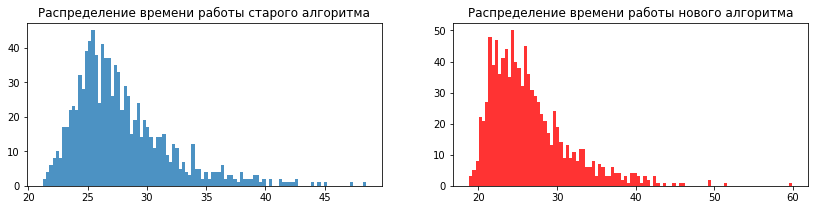

In [71]:
ln_distrib = stats.lognorm(0.5, loc = 20, scale = 7)
old_version = ln_distrib.rvs(size=1000)

ln_distrib = stats.lognorm(0.5, loc = 17, scale = 8.3)
new_version = ln_distrib.rvs(size=1000)

fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(old_version, 100, alpha=0.8)
plt.title('Распределение времени работы старого алгоритма')

ax1 = plt.subplot(122)
plt.hist(new_version, 100, alpha=0.8, color = 'r')
plt.title('Распределение времени работы нового алгоритма')

plt.show()

In [72]:
from sklearn.utils import resample

In [73]:
old_version_90p_boostrap_distribution = []
new_version_90p_boostrap_distribution = []

for i in range(5000):
    sample_old_version = resample(old_version, replace=True, n_samples=100, random_state=i)
    sample_new_version = resample(new_version, replace=True, n_samples=100, random_state=i)
    
    old_version_90p_boostrap_distribution.append(np.percentile(sample_old_version, 90))
    new_version_90p_boostrap_distribution.append(np.percentile(sample_new_version, 90))

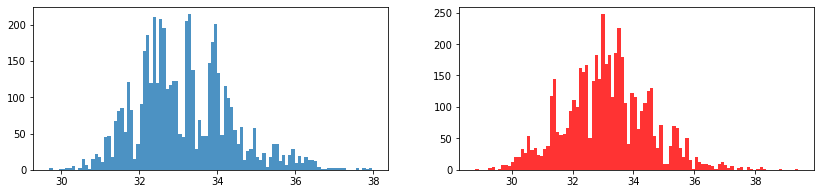

In [74]:
fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(old_version_90p_boostrap_distribution, 100, alpha=0.8)

ax1 = plt.subplot(122)
plt.hist(new_version_90p_boostrap_distribution, 100, alpha=0.8, color = 'r')

plt.show()

In [75]:
t, p = stats.ttest_ind(old_version_90p_boostrap_distribution, new_version_90p_boostrap_distribution )  

In [76]:
t

0.48532112143599315

In [80]:
p/2

0.3137296046410443

Не можем отвергнуть нулевую гипотезу о равенстве 90 перцентилей времени работы алгоритмов в пользу односторонней альтернативной.

### 3. Анализ зависимостей

### 3.1 Регрессия

Рассмотрим среднедневное кол-во заказов блюда "Пицца" ресторанов определенного сегмента на платформе DC в октябре 2018 года.

In [148]:
orders_info = pd.read_excel('files/oct_2018_Samara_pizza.xlsx')
orders_info.head()

,Price,Orders
0,912,32
1,958,25
2,979,11
3,530,33
4,750,16


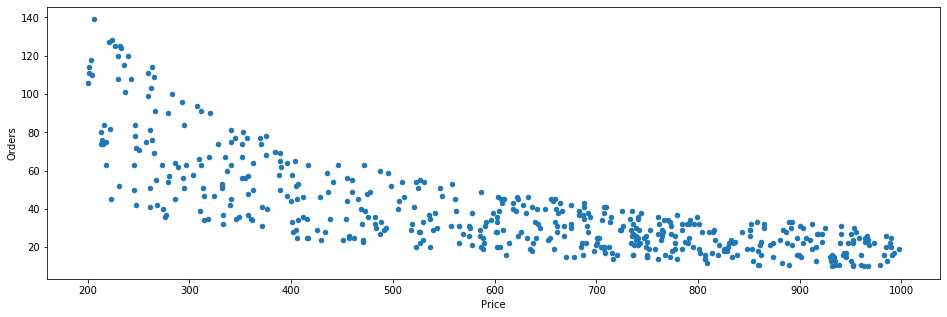

In [149]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)

**Задача.** На платформе появляется новый ресторан и хочет продавать Пиццу по определенной цене. Сколько у данного ресторана будет продаж в день?

In [152]:
import statsmodels.formula.api as smf
model = smf.ols('Orders~Price',data=orders_info)
fitted = model.fit()

In [153]:
fitted.params

Intercept    87.989346
Price        -0.080659
dtype: float64

In [154]:
orders_info['predicted'] = fitted.params[0] + fitted.params[1]*orders_info['Price']

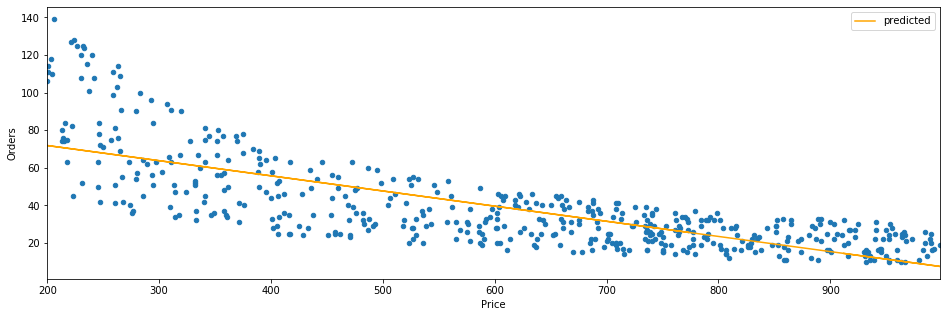

In [155]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)
orders_info.plot.line('Price','predicted',ax = ax1,color = 'orange')

In [156]:
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Orders   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     687.8
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           7.12e-96
Time:                        01:08:41   Log-Likelihood:                -2087.4
No. Observations:                 500   AIC:                             4179.
Df Residuals:                     498   BIC:                             4187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9893      1.999     44.010      0.0

**Коэффициент детерминации**

$\Large MSE = \frac{\sum_{i=1}^n(\hat{y_i}-y)^2}{n} $ 

Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводы том, насколько хорошо данная модель решает задачу. Вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации.

Попробуем нормализовать ошибку:

$ TSS =  ESS + RSS $

$TSS = \sum_{i=1}^n(y_i-\overline{y})^2 $ - разброс относительно своего среднего (~ ошибка наивного предсказания без X) 

$ESS = \sum_{i=1}^n(\hat{y_i}-\overline{y})^2 $ - объясненная сумма квадратов,сумма квадратов отклонений среднего от предсказанных y.

$RSS = \sum_{i=1}^n(\hat{y_i}-y_i)^2 $ - остаточная сумма квадратов.

$R^2 = \frac{ESS}{TSS}$ - **коэффициент детерминации**, доля объясненной дисперсии отклика во всей дисперсии отклика.

<img width = '1000px' src="images/lesson_9/lr_2.png">

In [157]:
fitted.rsquared

0.5800274817271208

Основная проблема применения коэффициента детерминации заключается в том, что его значение увеличивается от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют. 

Для того, чтобы была возможность сравнивать модели с разным числом признаков так, чтобы число регрессоров (признаков) не влияло на статистику  обычно используется **скорректированный коэффициент детерминации**.

$\Large R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k - 1}$,

n - кол-во наблюдений,

k - кол-во независимых переменных

In [123]:
fitted.rsquared_adj

0.5791841634173359

**Критерий Фишера**

Требуется проверить гипотезу о том, что все признаки X для предсказания y не нужны, то есть лучшее предсказание для y — это константа. 

$ H0: a_1 ... a_k = 0 $

$ H1: \text{H0 неверна} $

Статистика F:

$ \Large F =  \frac{R^2/k}{(1 - R^2)/(n-k-1)}$

In [127]:
fitted.fvalue

687.7918752588998

In [126]:
fitted.f_pvalue

7.124488003451089e-96

**Метод максимального правдоподобия**

**Метод максимального правдоподобия** -- метод поиска модели, наилучшим в каком-то смысле образом описывающей обучающую выборку, полученную с некоторым неизвестным распределением.

Отличный ресурс по статистике - https://www.youtube.com/user/joshstarmer

Откуда такая идея – искать значение параметра, при котором функция правдоподобия достигает максимума? 
Идея проистекает из представления о том, что выборка – это **единственный источник знания** о генеральной совокупности, доступный нам. Все, что мы знаем о генеральной совокупности, содержится в выборке. Поэтому нам
ничего иного не остается, как сказать, что выборка – это наиболее точное отражение
генеральной совокупности, доступное нам. А раз так, мы должны полностью положиться
на выборку и понять, каков должен быть искомый параметр, чтобы появление именно
такой выборки было наиболее вероятным. 

Центральная идея ММП – это поиск
такого значения параметра генеральной совокупности, при котором имеющаяся
выборка становится наиболее вероятной.

*-Как максимизировать максимальное правдободобие?*

*-Можно изменить параметры нашего распределения ( в данном случае - это среднее и стандартное отклонение).*

**При чем тут линейная регрессия?**

Если предположить, что каждое из наблюдений из тренировочного датасета немного неточно описывают исходный датасет (генеральную совокупность) - каждое наблюдение в отдельности - это случайная величина, взятая из нормального распредления. 

Цель линейной регрессии - воссоздать исходную модель генеральной совокупности с учетом неопределенности в распредлениях каждого из наблюдений.  

<img width = '600' src="images/lesson_9/ll.png">

Правдоподобие - произведение вероятностей каждого из наблюдений.

<img width = '600' src="images/lesson_9/eq1.png">

После логарифмирования и упрощения уравнение в векторной форме выглядит следующим образом.

<img width = '600' src="images/lesson_9/eq2.png">

**Информационные критерии**

**Информационный критерий** — мера относительного качества моделей, учитывающая степень «подгонки» модели под данные с корректировкой (штрафом) на используемое количество оцениваемых параметров. То есть критерии основаны на неком компромиссе между точностью и сложностью модели. 

$ AIC = 2k/n - 2l/n $

k - кол-во парметров модели, l - логарифмическая функция правдоподобия, n - объем выборки

${\displaystyle BIC=SC=k\ln n-2l}$

Данный критерий налагает больший штраф на увеличение количества параметров по сравнению с AIC, так как ${\displaystyle \ln n} {\displaystyle \ln n} $ больше 2 уже при количестве 8 наблюдений.

Чем меньше значение критерия, тем лучше модель.

**Критерий Стьюдента**

$ H0: a_i = 0 $

$ H1: a_i  <> 0 $

Статистика T:

$\Large T =  \frac{a_i}{\sqrt{\frac{RSS}{n-k-1}(XX^{t})^{-1}_{ii}}}$

Гипотеза о равенстве нулю коэффициента **a** означает, что признак x не влияет на отклик y.

In [144]:
fitted.tvalues

Intercept    44.009606
Price       -26.225786
dtype: float64

In [145]:
fitted.pvalues

Intercept    9.578626e-174
Price         7.124488e-96
dtype: float64

**Прочие индикаторы линейной регрессии**

Скос и эксцесс.

<img width = '450' src="images/lesson_9/skK.gif">

**Skew/Kurtosis** - меры скоса и эксцесса, ожидается значение ближе к 0.

**Omnibus/Prob(Omnibus)** - тест на скосс и эксцесс остатков модели линейной регрессии, Prob(Omnibus) ближе к 1 говорит о нормальности остатков модели.

**Durbin-Watson** - тест на автокорреляцию между остатками регрессионнной модели, наилучший показатель - значения между 1 и 2.

**Jarque-Bera (JB)/Prob(JB)** - тест по аналогии с тестом Omnibus.

**Condition Number** - тест на чувствительность результата модели к входным данным, например, в случае мультиколлинеарности (наличие зависимости между объясняющими переменными), малейшие изменения входных параметров могут сильно повлиять на результат модели, ожидается значение меньшее 30.

Почему в нашей модели такой большой Condition Number, если в ней всего лишь 1 переменная (Цена) ?

### 3.2 Корреляция

Регрессионный анализ позволяет оценить, как одна переменная
зависит от другой и каков разброс значений зависимой переменной вокруг прямой, определяющей зависимость.  Однако часто интересует не предсказание
значения одной переменной по значению другой, а просто характеристика тесноты (силы) связи между ними, при этом выраженная одним числом.

**Корреляция Пирсона**

$ \Large r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$

Корреляция Пирсона — это мера силы линейной взаимосвязи между двумя случайными величинами X1 и X2.

<img width = '900px' src="images/lesson_9/corp4.png">

In [104]:
orders_info[['Price','Orders']].corr()

,Price,Orders
Price,1.000000,-0.761595
Orders,-0.761595,1.000000


Как интерпретировать полученный коэффицент? 

Для ответа на вопрос по аналогии существует критерий (статистический критерий Стьюдента) и соответвующая статистика:

H0: r = 0

H1: r <> 0

$\Large T = \frac{r_{X_1X_2}\sqrt{n-2}}{\sqrt{1 - r_{X_1X_2}^2}}$

In [105]:
scipy.stats.pearsonr(orders_info.Price,orders_info.Orders)

(-0.7615953530104559, 7.124488003450482e-96)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена — это мера силы монотонной взаимосвязи между двумя случайными величинами, он равен коэффициенту корреляции Пирсона между рангами наблюдений.

$ \Large \rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}} $


<img width = '900px' src="images/lesson_9/cors4.png">

In [150]:
scipy.stats.spearmanr(orders_info.Price, orders_info.Orders)

SpearmanrResult(correlation=-0.7882611757083685, pvalue=4.320553213521898e-107)

**Корреялция Мэтьюса**

Коэффициент корреляции Мэтьюса — это мера силы взаимосвязи между двумя бинарными переменными. 

<img width = '500px' src="images/lesson_9/mat.png">

$\Large MCC = \frac{ad-bc}{\sqrt{(a+b)(a+c)(b+d)(c+d)}} $

Проверка значимости корреляции:

H0: MCC = 0

H1: MCC <> 0

Статистика критерия: $\chi^2  = nMCC^2$

In [107]:
#Коэффициент используется как качество моделей бинарной классификации
from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred) 

-0.3333333333333333

**Корреляция Крамера**

Коэффициент корреляции Крамера — это мера силы взаимосвязи между категориальными переменными. 

Коэффициент Крамера принимает значения исключительно в интервале от 0 до 1,то есть он не может быть отрицательным. 0 соответствует полному отсутствию взаимосвязи,а 1 — полному совпадению переменных X1 и X2 с точностью до переименования уровней. Корреляция между двумя категориальными переменными не может быть отрицательной,поскольку уровни категориальных переменных не связаны друг с другом отношениями порядков.

<img width = '500px' src="images/lesson_9/kram.png">

$ \Large \phi = \sqrt{\frac{\chi^2(X_1^n,X_2^n)}{n(min(K_1,K_2) - 1)} }$

Значимость критерия:

H0: X1 и X2 независимы

H1: H0 неверна

Статистика критерия - стаистика хи-квадрат.

In [ ]:
import pandas as pd
confusion_matrix = pd.crosstab(df[column1], df[column2])

In [110]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

### Литература

- Кобзарь. Прикладная математическая статистика (2006)
- Kanji. 100 statistical tests (2006)
- Глантц. Медико-биологическая статистика (1999)
- Лагутин. Наглядная математическая статистика (2007)